In [14]:
# Basic libs
import os
import re
import itertools
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (4,3)

# Machine Learning - pre-processing
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Machine Learning - post-processing
from sklearn.metrics import confusion_matrix, classification_report

# Data Preparation

The following cells are left for reproducibility.
In a different machine, it is not necessary to run these cells.
These are only for condensing the data into a .csv file.

In [3]:
material_properties = pd.read_csv('thermal_properties.csv', index_col='material')
material_properties.head()

,Z,symbol,rho,k,cp
material,,,,,
aluminum,13,al,2698.0,225.940,921
americium*,95,am,11700.0,12.552,126
antimony,51,sb,6696.0,18.410,207
arsenic_grey,33,as,5730.0,4.184,331
barium,56,ba,3500.0,33.472,188


In [4]:
q_listA = np.arange(1.e7, 1.e8, 2e6)  # W/m3
q_listB = np.arange(1.e8, 5.e8, 2e7)  # W/m3
q_list = np.concatenate([q_listA, q_listB])
tau_list = [20, 40, 60, 80, 100]

In [13]:
ofile_location = '/home/roberto/Documents/phd-results/cfd/decayMoose/'

In [ ]:
# I want my .csv to look like this:
# index, material number, material, rho, k, cp, qvalue, q0, tau0

# another csv will have the time information
# index, time

In [29]:
data = []
for m_index, material in enumerate(material_properties[:33].index):
    for q_index, q0 in enumerate(q_list):
        for tau_index, tau in enumerate(tau_list):
            q_id = q_index * len(tau_list) + tau_index
            rho = material_properties.loc[material]['rho']
            k = material_properties.loc[material]['k']
            cp = material_properties.loc[material]['cp']

            ofile = f'input_m{m_index}_q{q_superindex}.csv'
            if ofile not in os.listdir(ofile_location):
                print(f'Discarded sample. {ofile}: does not exist.')
                continue

            full_path = os.path.join(ofile_location, ofile)
            df = pd.read_csv(full_path, usecols=['time', 'max_temp'])
            df.rename(columns={"time": "t", "max_temp": "T"}, inplace=True)

            temp = df[['T']].values.T[0]
            time = df[['t']].values.reshape(1, -1)[0]
            if m_index == 0 and q_id == 0:
                time0 = time.copy()

            if time[-1] != 500.0:
                print(f'Discarded sample. {ofile}: Run not completed.')
                continue

            if len(time) != len(time0):
                n_temp = np.interp(time0, time, temp)
                temp = n_temp.copy()

            # material number, material, rho, k, cp, qvalue, q0, tau0
            data.append([m_index, material, rho, k, cp, q_id, q0, tau] + temp.tolist())

Discarded sample. input_m7_q322.csv: Run not completed.
Discarded sample. input_m8_q323.csv: Run not completed.
Discarded sample. input_m10_q319.csv: Run not completed.
Discarded sample. input_m21_q312.csv: Run not completed.


In [34]:
# material number, material, rho, k, cp, qvalue, q0, tau0
columns = [
    'materialNumber',
    'material',
    'rho',
    'k',
    'cp',
    'q_id',
    'q0',
    'tau']

columns += [f'T{i}' for i in range(len(time0))]
columns

['materialNumber',
 'material',
 'rho',
 'k',
 'cp',
 'q_id',
 'q0',
 'tau',
 'T0',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24',
 'T25',
 'T26',
 'T27',
 'T28',
 'T29',
 'T30',
 'T31',
 'T32',
 'T33',
 'T34',
 'T35',
 'T36',
 'T37',
 'T38',
 'T39',
 'T40',
 'T41',
 'T42',
 'T43',
 'T44',
 'T45',
 'T46',
 'T47',
 'T48',
 'T49',
 'T50']

In [43]:
df_data = pd.DataFrame(data, columns=columns)
df_data.head()

,materialNumber,material,rho,k,cp,q_id,q0,tau,T0,T1,...,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50
0,0,aluminum,2698.0,225.94,921,0,10000000.0,20,25.020121,25.044322,...,25.859701,25.395992,25.160721,25.057753,25.018837,25.005917,25.001961,25.000733,25.000301,25.000176
1,0,aluminum,2698.0,225.94,921,1,10000000.0,40,25.020126,25.044341,...,29.235889,27.622515,26.468948,25.732850,25.320034,25.120172,25.038248,25.010311,25.002442,25.000931
2,0,aluminum,2698.0,225.94,921,2,10000000.0,60,25.020128,25.044347,...,33.160295,30.857515,28.916887,27.411235,26.346793,25.670735,25.291868,25.108430,25.033556,25.015102
3,0,aluminum,2698.0,225.94,921,3,10000000.0,80,25.020129,25.044350,...,36.534787,33.967522,31.603345,29.564059,27.927544,26.718577,25.907925,25.423127,25.169929,25.093661
4,0,aluminum,2698.0,225.94,921,4,10000000.0,100,25.020129,25.044352,...,39.269606,36.654246,34.108892,31.764257,29.728876,28.077059,26.837994,25.991209,25.473160,25.295364


In [44]:
df_time = pd.DataFrame(time0, columns=['time'])
df_time.head()

,time
0,0.010000
1,0.022000
2,0.036400
3,0.053680
4,0.074416


In [45]:
# Export to .csv
df_data.to_csv('data.csv')
df_time.to_csv('time.csv')

# Import and prepare data

Start here.

In [2]:
# Get data
df_data = pd.read_csv('data.csv')
df_time = pd.read_csv('time.csv')

In [3]:
df_data.head()

,Unnamed: 0,materialNumber,material,rho,k,cp,q_id,q0,tau,T0,...,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50
0,0,0,aluminum,2698.0,225.94,921,0,10000000.0,20,25.020121,...,25.859701,25.395992,25.160721,25.057753,25.018837,25.005917,25.001961,25.000733,25.000301,25.000176
1,1,0,aluminum,2698.0,225.94,921,1,10000000.0,40,25.020126,...,29.235889,27.622515,26.468948,25.732850,25.320034,25.120172,25.038248,25.010311,25.002442,25.000931
2,2,0,aluminum,2698.0,225.94,921,2,10000000.0,60,25.020128,...,33.160295,30.857515,28.916887,27.411235,26.346793,25.670735,25.291868,25.108430,25.033556,25.015102
3,3,0,aluminum,2698.0,225.94,921,3,10000000.0,80,25.020129,...,36.534787,33.967522,31.603345,29.564059,27.927544,26.718577,25.907925,25.423127,25.169929,25.093661
4,4,0,aluminum,2698.0,225.94,921,4,10000000.0,100,25.020129,...,39.269606,36.654246,34.108892,31.764257,29.728876,28.077059,26.837994,25.991209,25.473160,25.295364


In [4]:
df_time.head()

,Unnamed: 0,time
0,0,0.010000
1,1,0.022000
2,2,0.036400
3,3,0.053680
4,4,0.074416


In [5]:
def separate_training_testing(x_data, y_data, train_size):
    """
    Randomly separates the data into train and test.

    Parameters:
    -----------
    x_data: 2D np.array, (# of samples, # of features)
        input data
    y_data: 2D np.array, (# of samples, # of outputs)
        output data
    train_size: int
        number of training samples

    Returns:
    --------
    x_train: 2D np.array, (# of train. samples, # of features)
        input training data
    y_train: 2D np.array, (# of train. samples, # of outputs)
        output training data
    x_test: 2D np.array, (# of samples-train. samples, # of features)
        input testing data
    y_test: 2D np.array, (# of train. samples, # of outputs)
        output testing data
    """
    big_matrix = np.concatenate((x_data, y_data), axis=1)
    np.random.seed(0)
    np.random.shuffle(big_matrix)

    x_train = big_matrix[:train_size, :x_data.shape[1]]
    y_train = big_matrix[:train_size, x_data.shape[1]:]
    x_test = big_matrix[train_size:, :x_data.shape[1]]
    y_test = big_matrix[train_size:, x_data.shape[1]:]

    return x_train, y_train, x_test, y_test


def convert_to_binary(ydata, Tmelt=650):
    """
    Converts temperature data to binary, where:
      1:failure
      0:no failure

    Parameters:
    -----------
    ydata: pandas dataframe
        max temperature data
    Returns:
    --------
    ydata: pandas dataframe
        data converted to binary
    """
    Tmelt = 650
    ydata[ydata < Tmelt] = 0
    ydata[ydata >= Tmelt] = 1
    return ydata


def calc_metrics(ytest, yhat):
    """
    Prints metrics of interest: Accuracy and Recall.
    """
    acc = classification_report(ytest, yhat, output_dict=True)['accuracy']
    rec = classification_report(ytest, yhat, output_dict=True)['1.0']['recall']  
    print(f"ACC: {acc}, REC: {rec}")

def plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False):
    """
    Plots non-normalized confusion matrix.
    """
    cnf_matrix = confusion_matrix(ytest, yhat, labels=[0, 1])
    classes=['0', '1']

    np.set_printoptions(precision=2)
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if save:
        plt.savefig(figname, dpi=300, bbox_inches="tight", facecolor='white')


In [6]:
xdata = df_data[['rho', 'k', 'cp', 'q0', 'tau']]
xdata.head()

,rho,k,cp,q0,tau
0,2698.0,225.94,921,10000000.0,20
1,2698.0,225.94,921,10000000.0,40
2,2698.0,225.94,921,10000000.0,60
3,2698.0,225.94,921,10000000.0,80
4,2698.0,225.94,921,10000000.0,100


In [8]:
ydata = df_data[[f'T{i}' for i in range(len(df_time))]]
ydata = ydata.max(axis=1)
ydata.head()

0    38.817296
1    43.363375
2    45.943156
3    47.646885
4    48.954290
dtype: float64

In [9]:
ydata_bin = convert_to_binary(ydata, 650)
ydata_bin.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [10]:
ydata_bin[ ydata_bin == 1 ].count()

2224

# Train/Test Machine Learning Models

In [11]:
# separate data into train/test
train_size = int(len(xdata)*0.8)
xtrain, ytrain, xtest, ytest = separate_training_testing(
    xdata.to_numpy(), ydata.to_numpy().reshape(-1, 1), train_size)

In [12]:
# standardize data
xscaler = StandardScaler()
norm_xtrain = xscaler.fit_transform(xtrain)
norm_xtest = xscaler.transform(xtest)

ACC: 0.9822843822843823, REC: 0.9796839729119639


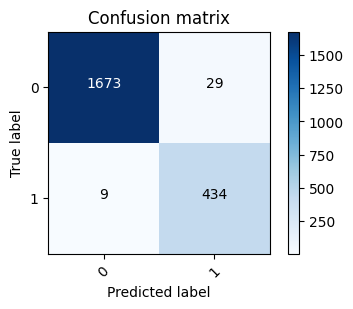

In [95]:
# SVM
model = SVC(kernel='rbf')
model.fit(norm_xtrain, ytrain[:, 0])

yhat = model.predict(norm_xtest)
calc_metrics(ytest, yhat)
plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False)

ACC: 0.9944055944055944, REC: 0.9864559819413092


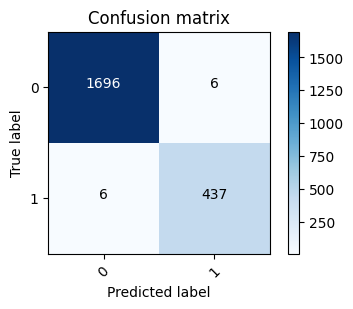

In [98]:
# DT
model = DecisionTreeClassifier()
model.fit(norm_xtrain, ytrain[:, 0])

yhat = model.predict(norm_xtest)
calc_metrics(ytest, yhat)
plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False)

ACC: 0.9944055944055944, REC: 0.9864559819413092


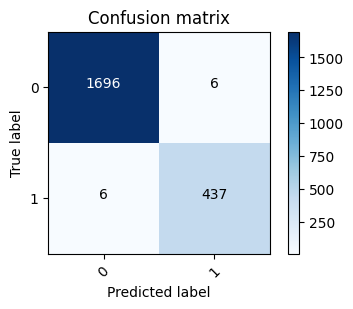

In [15]:
# RF
model = RandomForestClassifier()
model.fit(norm_xtrain, ytrain[:, 0])

yhat = model.predict(norm_xtest)
calc_metrics(ytest, yhat)
plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False)

ACC: 0.9678321678321679, REC: 0.9051918735891648


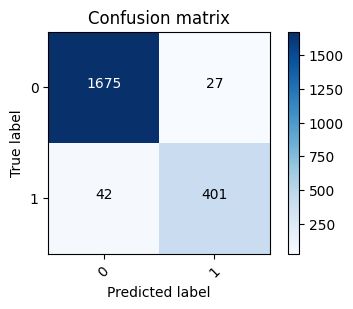

In [16]:
# LogReg
model = LogisticRegression(solver='liblinear')
model.fit(norm_xtrain, ytrain[:, 0])

yhat = model.predict(norm_xtest)
calc_metrics(ytest, yhat)
plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False)

ACC: 0.9902097902097902, REC: 0.9796839729119639


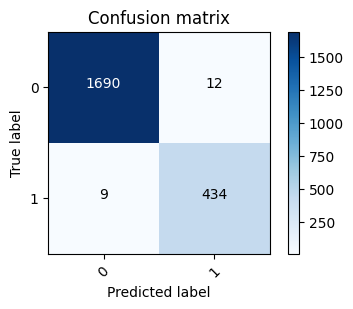

In [17]:
# KNN
# n_neighbors was optimized grid search based on the recall
model = KNeighborsClassifier(n_neighbors=3)
model.fit(norm_xtrain, ytrain[:, 0])

yhat = model.predict(norm_xtest)
calc_metrics(ytest, yhat)
plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False)

2024-01-29 10:13:21.060645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


68/68 [==============================] - 0s 1ms/step
ACC: 0.9948717948717949, REC: 1.0


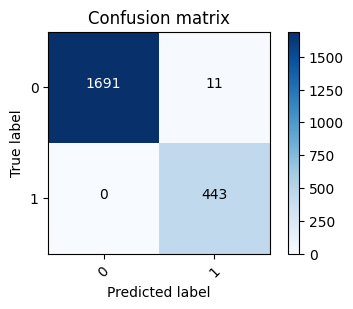

In [19]:
# FNN
# the following parameters were optimized using bayesian optimization based on the accuracy
n_layer_1, n_layer_2, batch_size = 38, 135, 36

model = Sequential()
model.add(Dense(n_layer_1, activation='relu', input_dim = norm_xtrain.shape[1]))
model.add(Dense(n_layer_2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(norm_xtrain, ytrain, epochs=60, batch_size=batch_size, validation_split=0.15, verbose=False)

yhat = model.predict(norm_xtest)
yhat[yhat >= 0.5] = 1
yhat[yhat < 0.5] = 0
calc_metrics(ytest, yhat)
plot_confusion_matrix(ytest, yhat, figname='cnfm', save=False)